In [3]:
import cv2
import numpy as np
import os
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from keras.layers import Dense, Activation, Dropout, Flatten

## Read Data

In [4]:
data_path = r'C:\Users\moham\Desktop\CNN\Emotion_Detection_Data'
data_path

'C:\\Users\\moham\\Desktop\\CNN\\Emotion_Detection_Data'

In [5]:
data_list = os.listdir(data_path) 
print(data_list)
img_data = [] 
for dataset in data_list: 
    img_list = os.listdir(os.path.join(data_path, dataset)) 
  #print(img_list)
  #print('loading the images from the folder -{}\n'.format(dataset))
  for img in img_list:
    input_img = cv2.imread(os.path.join(data_path, dataset, img))
    input_img_resized = cv2.resize(input_img, (50, 50))
    img_data.append(input_img_resized)
    #print(img_data)

['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']


In [6]:
data = np.array(img_data)
data = data.astype('float32')
data = data/255.0
data.shape

(981, 50, 50, 3)

In [8]:
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pandas as pd

In [9]:
num_classes = len(data_list)
num_samples = data.shape[1]
print(data_list)
print(num_samples)

['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']
981


## one hot encoding

In [35]:

labels = np.ones((num_samples), dtype='int64')


labels[0:135] = 0 #anger
labels[135:189] = 1 #contempt
labels[189:366] = 2 #disgust
labels[366:441] = 3 #fear
labels[441:648] = 4 #happy
labels[648:732] = 5 #surprise
labels[732:981] = 6 #surprise
#print(labels)

In [36]:
img_labels = to_categorical(labels, num_classes)
print(img_labels)

# shuffle the data
X_img, Y_img = shuffle(data, img_labels, random_state=2)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [37]:
x_train, x_test, y_train, y_test = train_test_split(X_img, Y_img, test_size=0.2, random_state=2)

## Show samples

In [38]:
import matplotlib.pyplot as plt

In [39]:
emotion = data_list

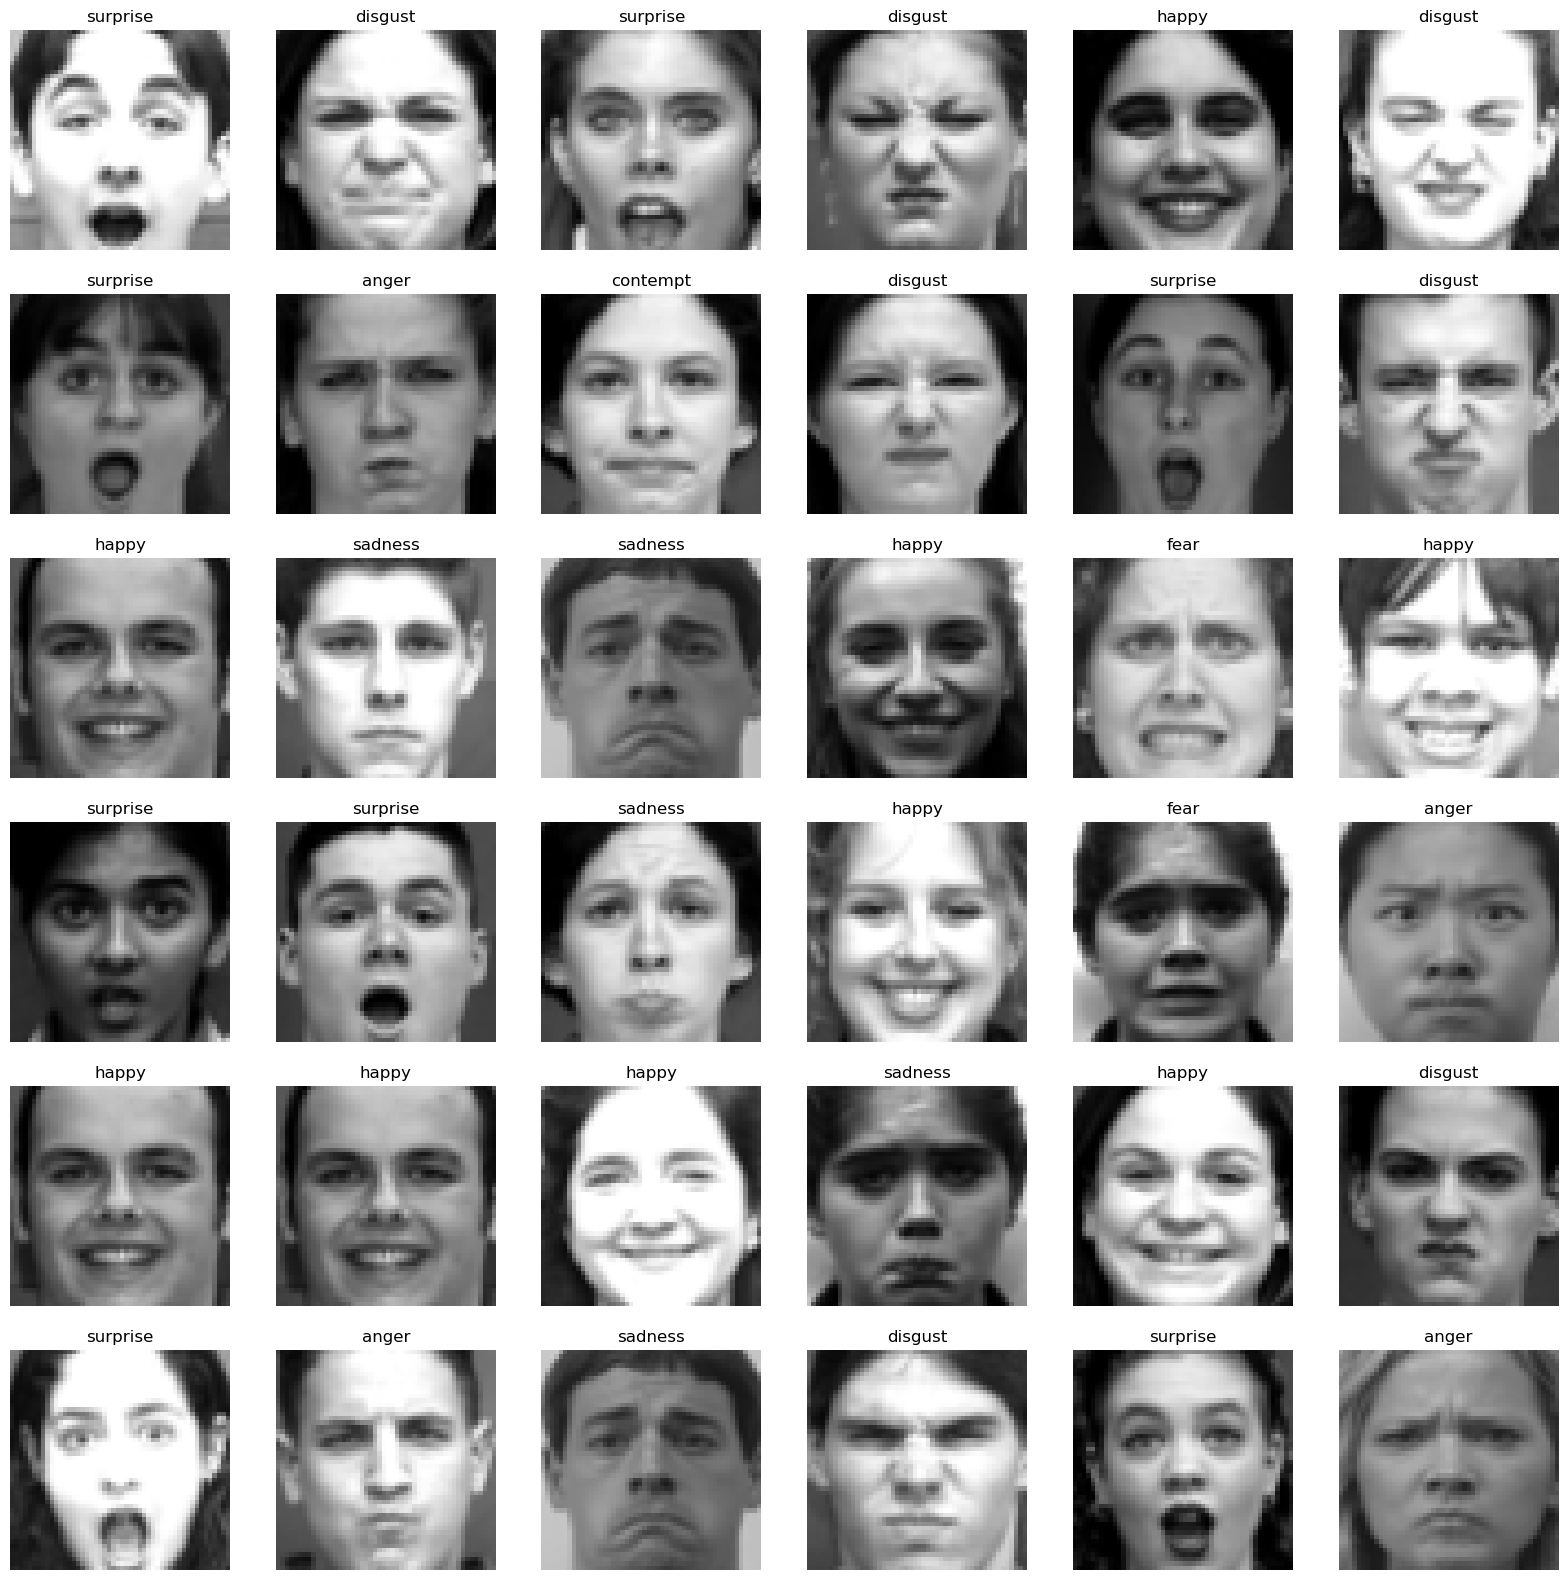

In [41]:
plt.figure(figsize = (20, 20))
for i,j in enumerate(list(np.random.randint(0, len(X_img), 36))):
  plt.subplot(6, 6, i+1)
  plt.imshow(X_img[j])
  plt.axis('off')
  plt.title(emotion[list(Y_img[j].astype(int)).index(1)])

## Build CNN model

In [42]:
def create_model():
  model = Sequential()
  model.add(Conv2D(6, (5, 5), input_shape = (50, 50, 3), padding = 'same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(16, (5, 5), padding = 'same', activation='relu'))
 
  model.add(Activation('relu'))
 
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (3, 3), padding = 'same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(128, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(7, activation = 'softmax'))
  
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  #model.compile(loss='to_categorical', metrices = ['accuracy'], optimizer='adam')

  return model

In [43]:
model = create_model()

C:\Users\moham\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
his = model.fit(x_train, y_train, epochs = 200, validation_data=(x_test, y_test))

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.2241 - loss: 1.8770 - val_accuracy: 0.4315 - val_loss: 1.7182
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3730 - loss: 1.7121 - val_accuracy: 0.5888 - val_loss: 1.1504
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5807 - loss: 1.1739 - val_accuracy: 0.6701 - val_loss: 0.8305
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6106 - loss: 1.0102 - val_accuracy: 0.7766 - val_loss: 0.6375
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7073 - loss: 0.7417 - val_accuracy: 0.8680 - val_loss: 0.4752
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7743 - loss: 0.6029 - val_accuracy: 0.8223 - val_loss: 0.4553
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7874 - loss: 0.6123 - val_accuracy: 0.9239 - val_loss: 0.2735
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8320 - loss: 0.4451 - val_accuracy: 0.9442

Testing

In [45]:
loss, score = model.evaluate(x_test, y_test, verbose=0)
print(loss)
print(score)

0.03971222788095474
0.9949238300323486


Accuracy is: 99.492383
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


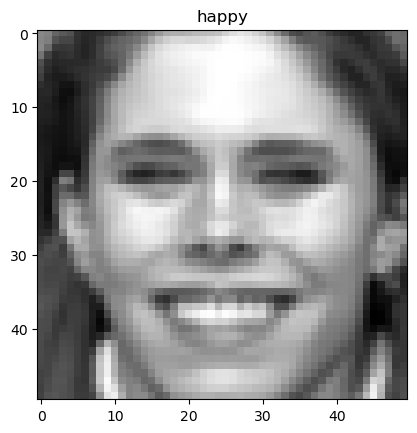

In [46]:
print('Accuracy is: %f' % (100*score))
def pred_sample(index):
  y_pred = model.predict(x_test[index:index + 1])
  plt.imshow(x_test[index])
  # check el 1 3and anhy name w ye5aleeh el index el gowa el emotion 3ashan yetala3 el emotion
  # w 3ashan t5aleha zay el title goz2 men el pic w f nos w kda han7otaha gowa plt.title
  plt.title(emotion[list(y_pred.astype(int).flatten()).index(1)])

pred_sample(69)

## Draw losses and accuracies

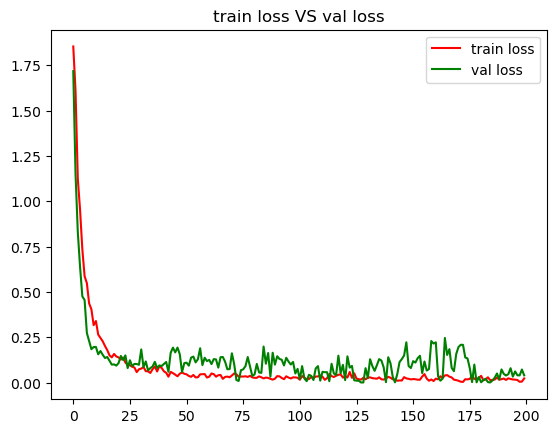

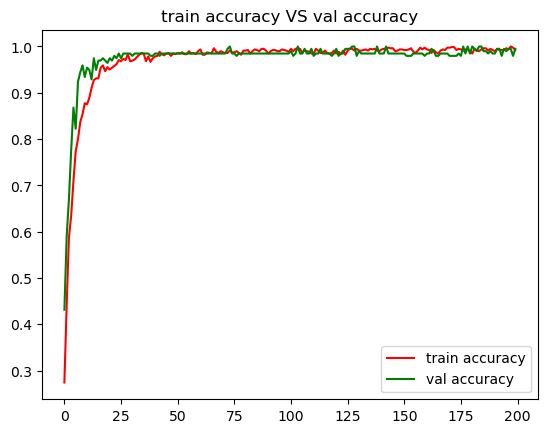

In [47]:
train_loss = his.history['loss']
val_loss = his.history['val_loss']
train_accuracy = his.history['accuracy']
val_accuracy = his.history['val_accuracy']

steps = range(len(train_loss))

plt.plot(steps, train_loss, 'r', label='train loss')
plt.plot(steps, val_loss, 'g', label='val loss')
plt.title('train loss VS val loss')
plt.legend()

plt.figure()

plt.plot(steps, train_accuracy, 'r', label='train accuracy')
plt.plot(steps, val_accuracy, 'g', label='val accuracy')
plt.title('train accuracy VS val accuracy')
plt.legend()